In [ ]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Data Exploration and Visualization


### Download dataset from https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset?resource=download first

In [ ]:
# getting the training and validation data
data_dir = "D:/NUS/IS5126/final-project/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [ ]:
# getting the training data from the directory, and dividing it into batches
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size=32,
    image_size=(256,256), shuffle=True
)

Found 140590 files belonging to 38 classes.


In [ ]:
# getting the validation data from the directory, and dividing it into batches
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    batch_size=32,
    image_size=(256,256), shuffle=True
)

Found 35144 files belonging to 38 classes.


In [ ]:
path = "D:/NUS/IS5126/final-project/archive/test/test"
test_folder = os.listdir(path)
test_folder[:10]

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG']

In [ ]:
print(f'The total nummber of classes is {len(train_data.class_names)}')
class_labels = train_data.class_names
class_labels

The total nummber of classes is 38


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

## load subset

In [ ]:
import os
import numpy as np
from keras.preprocessing import image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Function to load subset of resized images and labels
def load_subset_resized_images_and_labels(directory, subset_size=1000, target_size=(64, 64)):
    images, labels = [], []
    classes = os.listdir(directory)
    print("Loading subset of resized images...")
    for class_name in classes:
        class_dir = os.path.join(directory, class_name)
        image_files = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]
        if len(image_files) <= subset_size:
            selected_files = image_files
        else:
            selected_files = np.random.choice(image_files, subset_size, replace=False)
        for img_path in selected_files:
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            images.append(img_array.flatten())  # Flatten image into a vector
            labels.append(classes.index(class_name))  # Assign label
    print("Subset of resized images loaded successfully.")
    return np.array(images), np.array(labels)


# Load subset of resized training and validation data
train_images, train_labels = load_subset_resized_images_and_labels(train_dir)
valid_images, valid_labels = load_subset_resized_images_and_labels(valid_dir)


Loading subset of resized images...
Subset of resized images loaded successfully.
Loading subset of resized images...
Subset of resized images loaded successfully.


In [ ]:
len(train_images),len(valid_images)# #38000 35116

(38000, 35116)

## PCA

In [ ]:
from sklearn.decomposition import PCA


# Initialize PCA - start with a PCA that retains 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the training images only
pca.fit(train_images)

# Transform both training and validation images
train_images_pca = pca.transform(train_images)
valid_images_pca = pca.transform(valid_images)


# KNN Model Training and Evaluation



In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
print("Training KNN model...")
knn.fit(train_images_pca, train_labels) ## Train KNN model on PCA-transformed training data
print("KNN model training completed.")

# Predict on the validation set
print("Making predictions on the validation set...")
val_predictions = knn.predict(valid_images_pca) ## Predict on the PCA-transformed validation set
print("Predictions made.")

# Evaluate the model
cm_3 = confusion_matrix(valid_labels, val_predictions)
print('Validation set accuracy:', accuracy_score(valid_labels, val_predictions))
print('Classification report:\n', classification_report(valid_labels, val_predictions))
print('Confusion matrix:\n', confusion_matrix(valid_labels, val_predictions))


Training KNN model...
KNN model training completed.
Making predictions on the validation set...
Predictions made.
Validation set accuracy: 0.39184417359608154
Classification report:
               precision    recall  f1-score   support

           0       0.26      0.47      0.33      1000
           1       0.74      0.32      0.44       994
           2       0.11      0.75      0.19       880
           3       0.37      0.47      0.41      1000
           4       0.70      0.35      0.46       908
           5       0.33      0.72      0.46       912
           6       0.22      0.47      0.30       842
           7       0.61      0.24      0.34       820
           8       0.98      0.92      0.95       954
           9       0.86      0.80      0.83       930
          10       0.64      0.31      0.42       954
          11       0.40      0.64      0.50       944
          12       0.61      0.14      0.23       960
          13       0.43      0.69      0.53       846
      

In [ ]:
# Initialize the KNN classifier
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
print("Training KNN model...")
knn_5.fit(train_images_pca, train_labels) ## knn.fit(train_images_pca, train_labels)  # Train KNN model on PCA-transformed training data
print("KNN model training completed.")

# Predict on the validation set
print("Making predictions on the validation set...")
val_predictions_5 = knn_5.predict(valid_images_pca) ## val_predictions = knn.predict(valid_images_pca) # Predict on the PCA-transformed validation set
print("Predictions made.")

# Evaluate the model
cm_5 = confusion_matrix(valid_labels, val_predictions_5)
print('Validation set accuracy:', accuracy_score(valid_labels, val_predictions_5))
print('Classification report:\n', classification_report(valid_labels, val_predictions_5))
print('Confusion matrix:\n', confusion_matrix(valid_labels, val_predictions_5))


Training KNN model...
KNN model training completed.
Making predictions on the validation set...
Predictions made.
Validation set accuracy: 0.3946349242510537
Classification report:
               precision    recall  f1-score   support

           0       0.31      0.44      0.37      1000
           1       0.80      0.30      0.44       994
           2       0.12      0.76      0.20       880
           3       0.43      0.47      0.45      1000
           4       0.69      0.33      0.45       908
           5       0.35      0.72      0.48       912
           6       0.20      0.47      0.28       842
           7       0.65      0.24      0.35       820
           8       1.00      0.92      0.96       954
           9       0.89      0.81      0.85       930
          10       0.65      0.34      0.45       954
          11       0.42      0.66      0.51       944
          12       0.69      0.11      0.19       960
          13       0.40      0.73      0.52       846
       

In [ ]:
# Initialize the KNN classifier
knn_7 = KNeighborsClassifier(n_neighbors=7)

# Train the KNN model
print("Training KNN model...")
knn_7.fit(train_images_pca, train_labels) ## knn.fit(train_images_pca, train_labels)  # Train KNN model on PCA-transformed training data
print("KNN model training completed.")

# Predict on the validation set
print("Making predictions on the validation set...")
val_predictions_7 = knn_7.predict(valid_images_pca) ## val_predictions = knn.predict(valid_images_pca) # Predict on the PCA-transformed validation set
print("Predictions made.")

# Evaluate the model
cm_7 = confusion_matrix(valid_labels, val_predictions_7)
print('Validation set accuracy:', accuracy_score(valid_labels, val_predictions_7))
print('Classification report:\n', classification_report(valid_labels, val_predictions_7))
print('Confusion matrix:\n', confusion_matrix(valid_labels, val_predictions_7))


Training KNN model...
KNN model training completed.
Making predictions on the validation set...
Predictions made.
Validation set accuracy: 0.38916733113110835
Classification report:
               precision    recall  f1-score   support

           0       0.34      0.40      0.37      1000
           1       0.83      0.27      0.41       994
           2       0.11      0.77      0.20       880
           3       0.44      0.48      0.46      1000
           4       0.67      0.28      0.40       908
           5       0.35      0.73      0.48       912
           6       0.19      0.43      0.26       842
           7       0.62      0.22      0.32       820
           8       1.00      0.91      0.95       954
           9       0.90      0.79      0.84       930
          10       0.65      0.33      0.44       954
          11       0.41      0.65      0.50       944
          12       0.71      0.10      0.18       960
          13       0.39      0.73      0.51       846
      

In [ ]:
# Initialize the KNN classifier
knn_9 = KNeighborsClassifier(n_neighbors=9)

# Train the KNN model
print("Training KNN model...")
knn_9.fit(train_images_pca, train_labels) ## knn.fit(train_images_pca, train_labels)  # Train KNN model on PCA-transformed training data
print("KNN model training completed.")

# Predict on the validation set
print("Making predictions on the validation set...")
val_predictions_9 = knn_9.predict(valid_images_pca) ## val_predictions = knn.predict(valid_images_pca) # Predict on the PCA-transformed validation set
print("Predictions made.")

# Evaluate the model
cm_9 = confusion_matrix(valid_labels, val_predictions_9)
print('Validation set accuracy:', accuracy_score(valid_labels, val_predictions_9))
print('Classification report:\n', classification_report(valid_labels, val_predictions_9))
print('Confusion matrix:\n', confusion_matrix(valid_labels, val_predictions_9))


Training KNN model...
KNN model training completed.
Making predictions on the validation set...
Predictions made.
Validation set accuracy: 0.38352887572616473
Classification report:
               precision    recall  f1-score   support

           0       0.35      0.37      0.36      1000
           1       0.83      0.26      0.40       994
           2       0.11      0.75      0.20       880
           3       0.45      0.46      0.45      1000
           4       0.68      0.26      0.38       908
           5       0.34      0.73      0.46       912
           6       0.19      0.43      0.26       842
           7       0.64      0.21      0.32       820
           8       1.00      0.91      0.95       954
           9       0.91      0.80      0.85       930
          10       0.65      0.33      0.43       954
          11       0.40      0.64      0.50       944
          12       0.70      0.08      0.15       960
          13       0.40      0.75      0.52       846
      

In [ ]:
# Initialize the KNN classifier
knn_15 = KNeighborsClassifier(n_neighbors=15)

# Train the KNN model
print("Training KNN model...")
knn_15.fit(train_images_pca, train_labels) ## knn.fit(train_images_pca, train_labels)  # Train KNN model on PCA-transformed training data
print("KNN model training completed.")

# Predict on the validation set
print("Making predictions on the validation set...")
val_predictions_15 = knn_15.predict(valid_images_pca) ## val_predictions = knn.predict(valid_images_pca) # Predict on the PCA-transformed validation set
print("Predictions made.")

# Evaluate the model
cm_15 = confusion_matrix(valid_labels, val_predictions_15)
print('Validation set accuracy:', accuracy_score(valid_labels, val_predictions_15))
print('Classification report:\n', classification_report(valid_labels, val_predictions_15))
print('Confusion matrix:\n', confusion_matrix(valid_labels, val_predictions_15))


Training KNN model...
KNN model training completed.
Making predictions on the validation set...
Predictions made.
Validation set accuracy: 0.3765519990887345
Classification report:
               precision    recall  f1-score   support

           0       0.40      0.33      0.36      1000
           1       0.87      0.22      0.35       994
           2       0.11      0.74      0.19       880
           3       0.48      0.46      0.47      1000
           4       0.68      0.23      0.35       908
           5       0.34      0.71      0.46       912
           6       0.18      0.44      0.26       842
           7       0.71      0.22      0.34       820
           8       1.00      0.91      0.95       954
           9       0.91      0.78      0.84       930
          10       0.61      0.29      0.40       954
          11       0.41      0.66      0.51       944
          12       0.73      0.07      0.13       960
          13       0.36      0.76      0.49       846
       

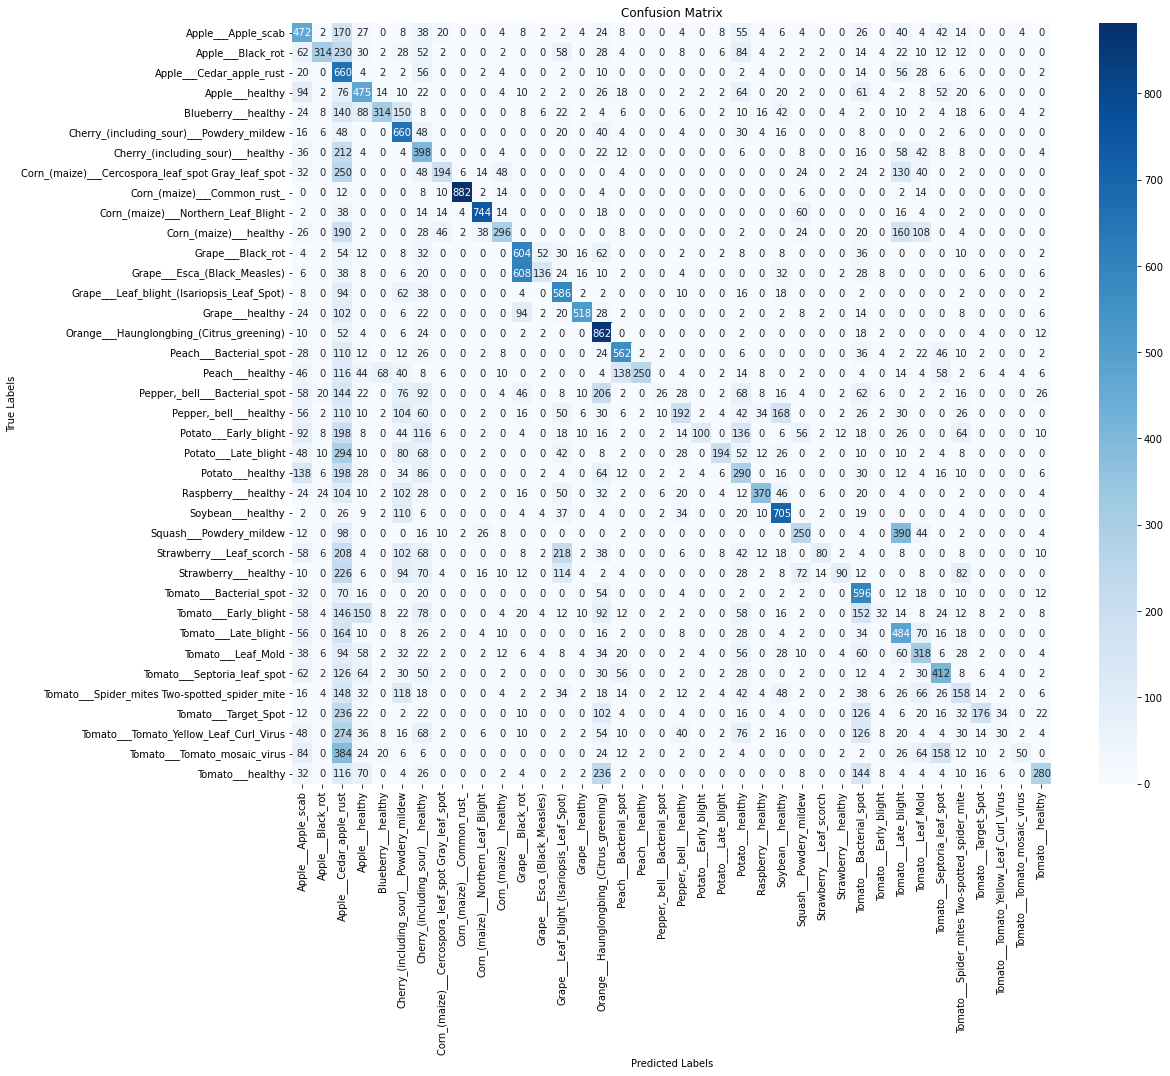

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 14))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

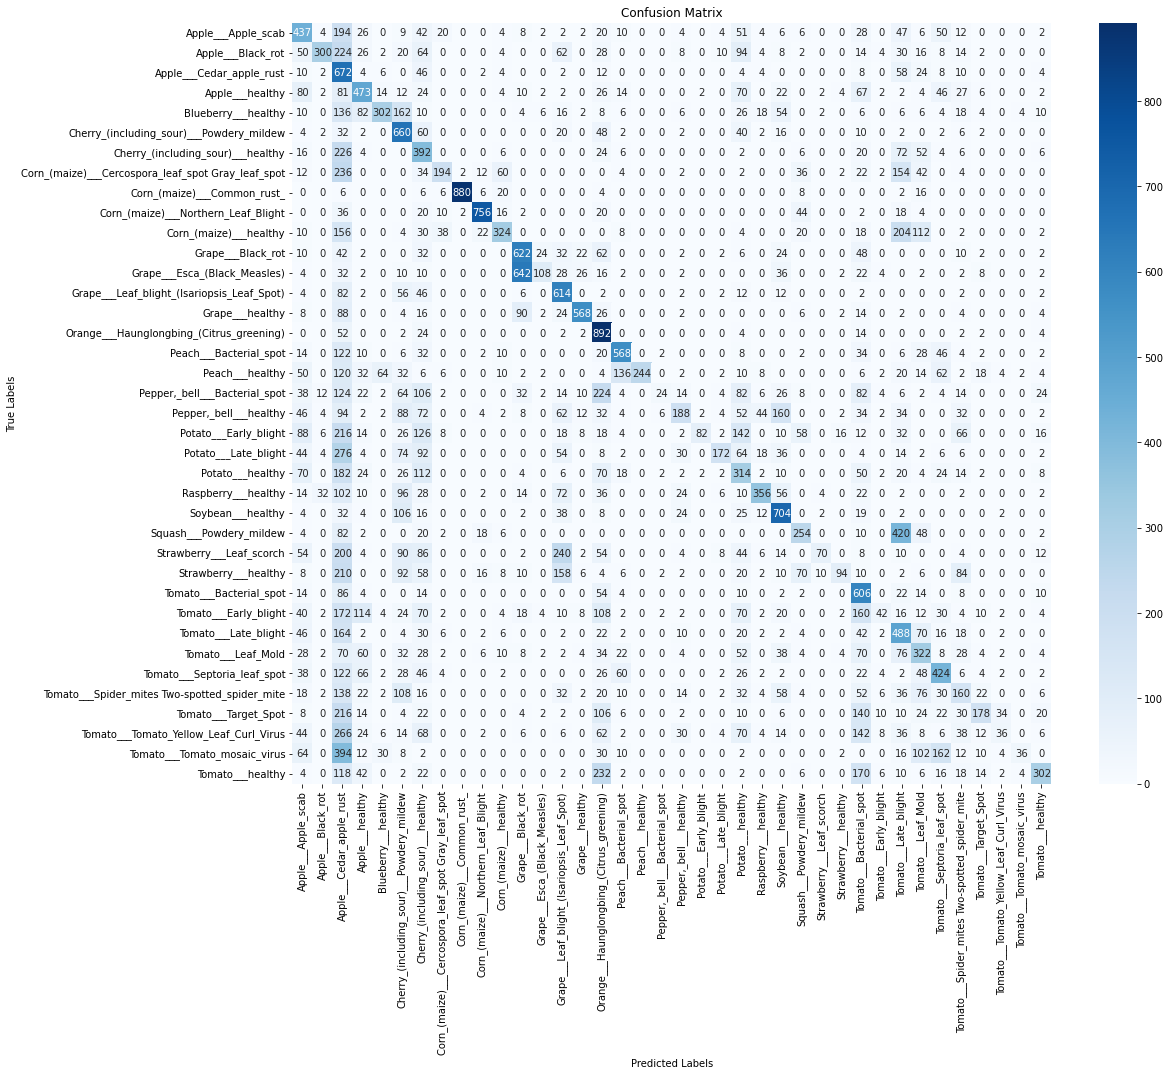

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 14))
sns.heatmap(cm_5, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

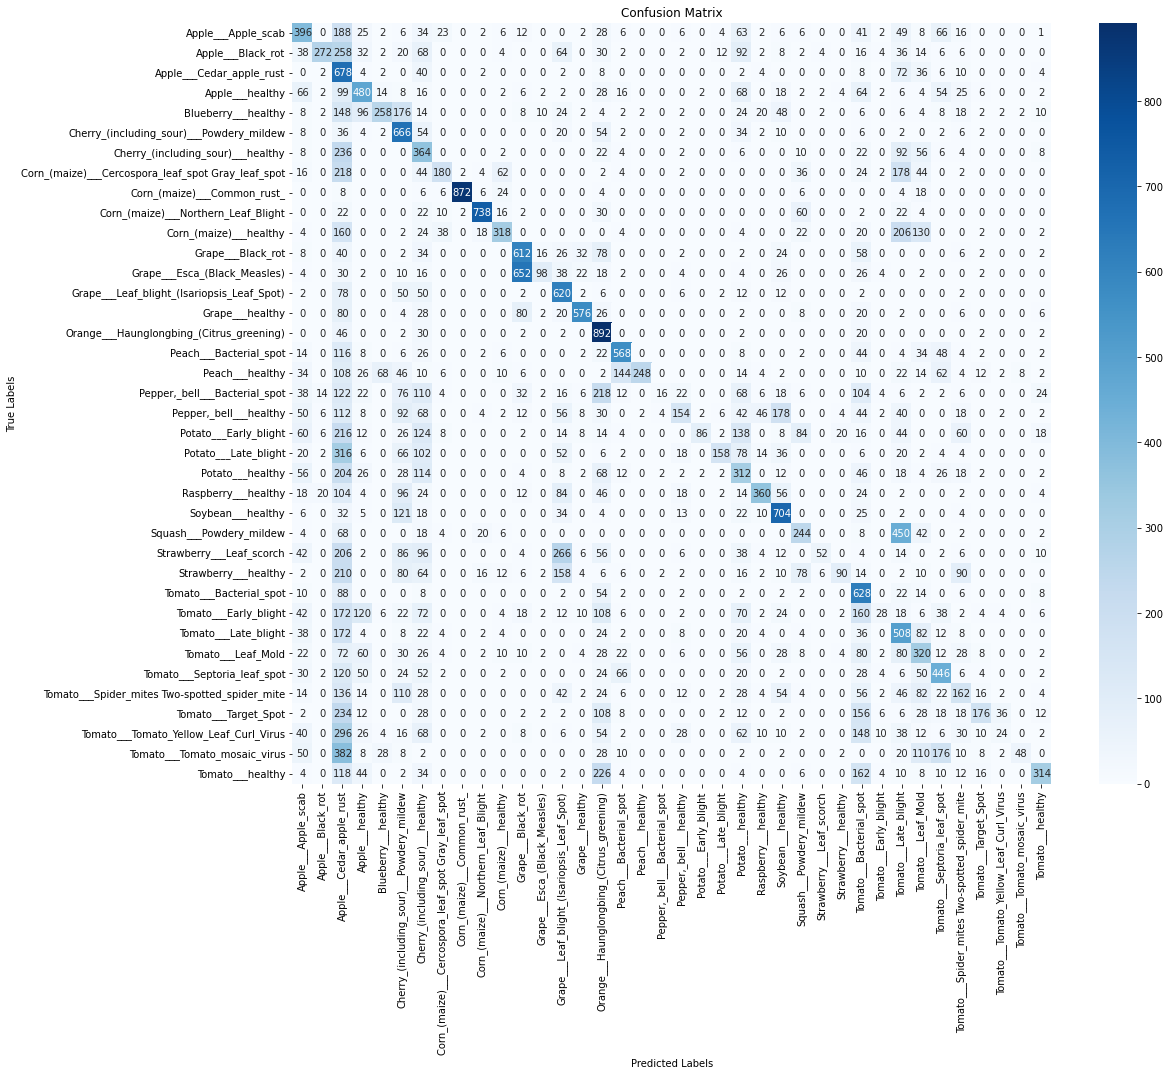

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 14))
sns.heatmap(cm_7, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

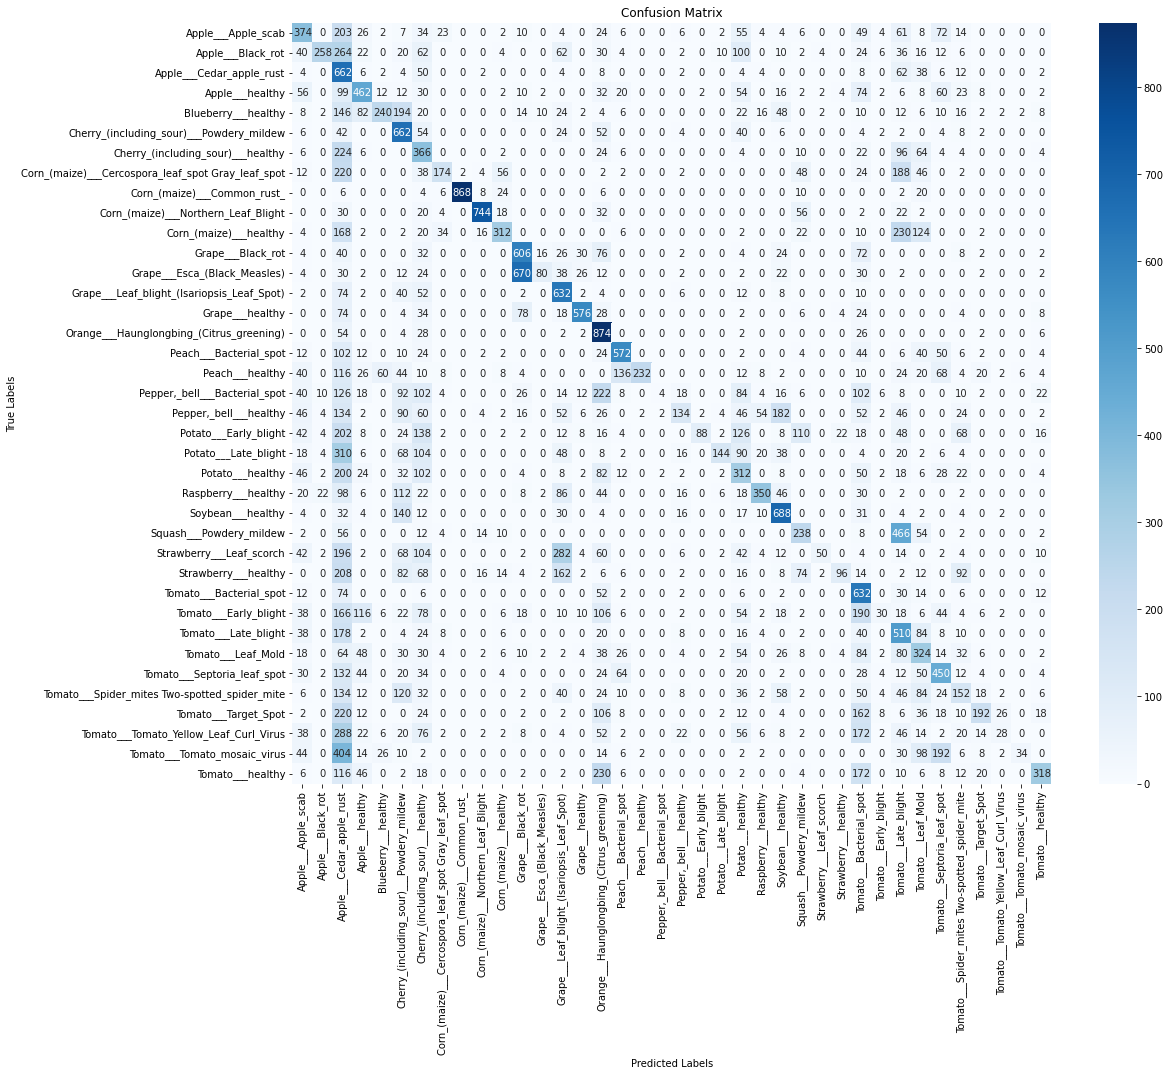

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 14))
sns.heatmap(cm_9, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()